In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
final_df = pd.read_parquet('final_data_without_speech.parquet')

final_df.head()

,iso_3,year_x,sentiment,total_amount_paragraphs,amount_climate_change_paragraphs,amount_of_time_spent_on_climate,Region Name,Sub-region Name,Entity,year_y,Annual CO₂ emissions (per capita)
0,AFG,2013,NaN,37,0,0.0,Asia,Southern Asia,Afghanistan,1949,0.001992
1,AFG,2013,NaN,37,0,0.0,Asia,Southern Asia,Afghanistan,1950,0.011266
2,AFG,2013,NaN,37,0,0.0,Asia,Southern Asia,Afghanistan,1951,0.012098
3,AFG,2013,NaN,37,0,0.0,Asia,Southern Asia,Afghanistan,1952,0.011946
4,AFG,2013,NaN,37,0,0.0,Asia,Southern Asia,Afghanistan,1953,0.013685


# Exploratory Data Analysis

For this EDA, we our going to examine the relationships between the sentiment score of a country (based on the grouped paragraphs of the text UN speech split) and the amount of time talked about climate change in the speeches. Also the relationship between the sentiment and the annual emissions for that country is analyzed.

Both will initially be analyzed through correlations.



### Sentiment & Time Spent

In [7]:
# Group by country_name and year, calculate mean sentiment score
grouped_sentiment_data = final_df.groupby(['Entity', 'year_y'])['sentiment'].mean().reset_index()

# DataFrame with mean sentiment score for each country and year
grouped_sentiment_data.head()

,Entity,year_y,sentiment
0,Afghanistan,1949,0.075278
1,Afghanistan,1950,0.075278
2,Afghanistan,1951,0.075278
3,Afghanistan,1952,0.075278
4,Afghanistan,1953,0.075278


In [9]:
# Group by country_name and year, calculate mean corruption score
grouped_timespent_data = final_df.groupby(['Entity', 'year_y'])['amount_of_time_spent_on_climate'].mean().reset_index()

# DataFrame with mean corruption score for each country and year
grouped_timespent_data.head()

,Entity,year_y,amount_of_time_spent_on_climate
0,Afghanistan,1949,0.045447
1,Afghanistan,1950,0.045447
2,Afghanistan,1951,0.045447
3,Afghanistan,1952,0.045447
4,Afghanistan,1953,0.045447


In [10]:
# Merge DataFrames on 'country_name' and 'year'
merged_df = pd.merge(grouped_sentiment_data, grouped_timespent_data, on=['Entity', 'year_y'])
merged_df.head()

,Entity,year_y,sentiment,amount_of_time_spent_on_climate
0,Afghanistan,1949,0.075278,0.045447
1,Afghanistan,1950,0.075278,0.045447
2,Afghanistan,1951,0.075278,0.045447
3,Afghanistan,1952,0.075278,0.045447
4,Afghanistan,1953,0.075278,0.045447


In [11]:
# Calculate overall correlation
correlation = merged_df['sentiment'].corr(merged_df['amount_of_time_spent_on_climate'])
correlation

0.07488595098276377

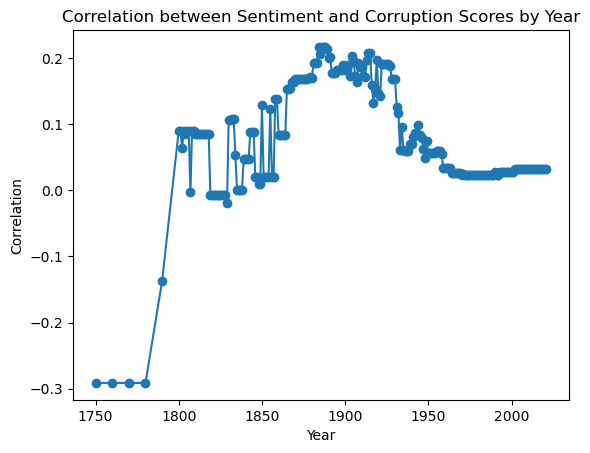

In [13]:
# Calculate correlation for each year
correlations_by_year = merged_df.groupby('year_y')[['sentiment', 'amount_of_time_spent_on_climate']].corr().iloc[0::2,-1].reset_index()
correlations_by_year.rename(columns={'amount_of_time_spent_on_climate': 'correlation'}, inplace=True)

# Plotting
plt.plot(correlations_by_year['year_y'], correlations_by_year['correlation'], marker='o')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation between Sentiment and Time Spent on Climate Talk by Year')
plt.show()

In [14]:
# Print the correlation values for each year
print("Correlation between Sentiment and Time Spent on Climate Talk by Year:")
print(correlations_by_year)

Correlation between Sentiment and Corruption Scores by Year:
     year_y    level_1  correlation
0      1750  sentiment    -0.291265
1      1760  sentiment    -0.291265
2      1770  sentiment    -0.291265
3      1780  sentiment    -0.291265
4      1790  sentiment    -0.136908
..      ...        ...          ...
222    2017  sentiment     0.031247
223    2018  sentiment     0.031247
224    2019  sentiment     0.031247
225    2020  sentiment     0.031247
226    2021  sentiment     0.031247

[227 rows x 3 columns]


### Sentiment & Annual Emissions 

In [15]:
# Group by country_name and year, calculate mean corruption score
grouped_emissions_data = final_df.groupby(['Entity', 'year_y'])['Annual CO₂ emissions (per capita)'].mean().reset_index()

# DataFrame with mean corruption score for each country and year
grouped_emissions_data.head()

,Entity,year_y,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.011266
2,Afghanistan,1951,0.012098
3,Afghanistan,1952,0.011946
4,Afghanistan,1953,0.013685


In [16]:
# Merge DataFrames on 'country_name' and 'year'
merged_df2 = pd.merge(grouped_sentiment_data, grouped_emissions_data, on=['Entity', 'year_y'])
merged_df2.head()

,Entity,year_y,sentiment,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.075278,0.001992
1,Afghanistan,1950,0.075278,0.011266
2,Afghanistan,1951,0.075278,0.012098
3,Afghanistan,1952,0.075278,0.011946
4,Afghanistan,1953,0.075278,0.013685


In [17]:
# Calculate overall correlation
correlation = merged_df2['sentiment'].corr(merged_df2['Annual CO₂ emissions (per capita)'])
correlation

0.09714415800381376

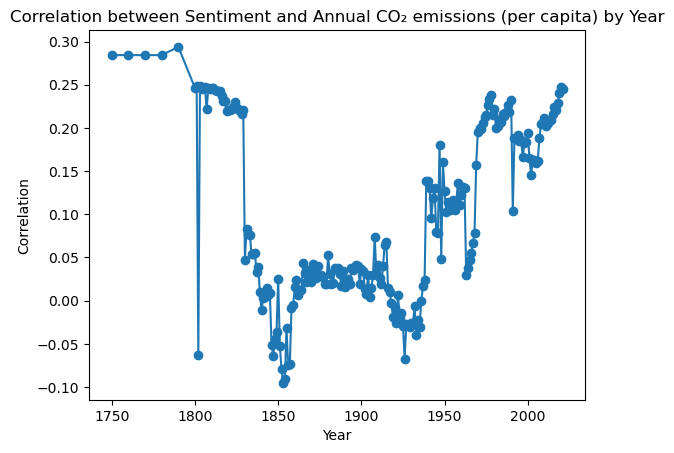

In [22]:
# Calculate correlation for each year
correlations_by_year2 = merged_df2.groupby('year_y')[['sentiment', 'Annual CO₂ emissions (per capita)']].corr().iloc[0::2,-1].reset_index()
correlations_by_year2.rename(columns={'Annual CO₂ emissions (per capita)': 'correlation'}, inplace=True)

# Plotting
plt.plot(correlations_by_year2['year_y'], correlations_by_year2['correlation'], marker='o')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation between Sentiment and Annual CO₂ emissions (per capita) by Year')
plt.show()

In [23]:
# Print the correlation values for each year
print("Correlation between Sentiment and Emissions by Year:")
print(correlations_by_year2)

Correlation between Sentiment and Emissions by Year:
     year_y    level_1  correlation
0      1750  sentiment     0.284354
1      1760  sentiment     0.284354
2      1770  sentiment     0.284354
3      1780  sentiment     0.284354
4      1790  sentiment     0.293851
..      ...        ...          ...
222    2017  sentiment     0.221206
223    2018  sentiment     0.228718
224    2019  sentiment     0.240051
225    2020  sentiment     0.247208
226    2021  sentiment     0.244918

[227 rows x 3 columns]
